In [209]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
# from matplotlib import cmsweep
from matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt

from psPlotKit.data_plotter.fig_generator import figureGenerator

In [210]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams['font.size'] = 18
plt.rcParams['font.weight'] = 'bold'
text_size_default = 18

In [211]:
data_seawater = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\prop_data\data_property_sea_reaktoro.csv')
data_bw = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\prop_data\data_property_bw_reaktoro.csv')
data_seawater_OP = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\prop_data\data_property_sea_reaktoro_osm_p.csv')
data_bw_OP = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\prop_data\data_property_bw_reaktoro_osm_p.csv')

In [212]:

data_sea = pd.concat([data_seawater, data_seawater_OP["Osmotic Pressure"]], axis=1)
data_bw = pd.concat([data_bw, data_bw_OP["Osmotic Pressure"]], axis=1)

In [213]:
# # find errors and create dataframe
# results_col = ["# Feed Mass Frac","Density","Enthalpy","Vapor Pressure","Osmotic Pressure"] 
# abs_dif = pd.DataFrame()

# for i in results_col:
#     abs_dif[i] = pd.DataFrame((abs(data_sea[i] - data_bw[i])/data_sea[i])*100)
    

In [214]:

# for i in results_col:
#     print(i)
#     print(np.max(abs_dif[i]))

In [215]:
sea_color = "#FFD046"
bw_color = "#4A7B9D"

title_size = 18

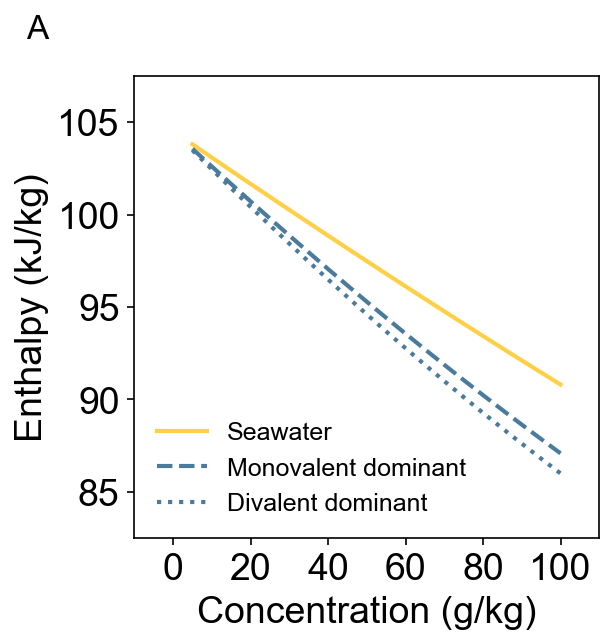

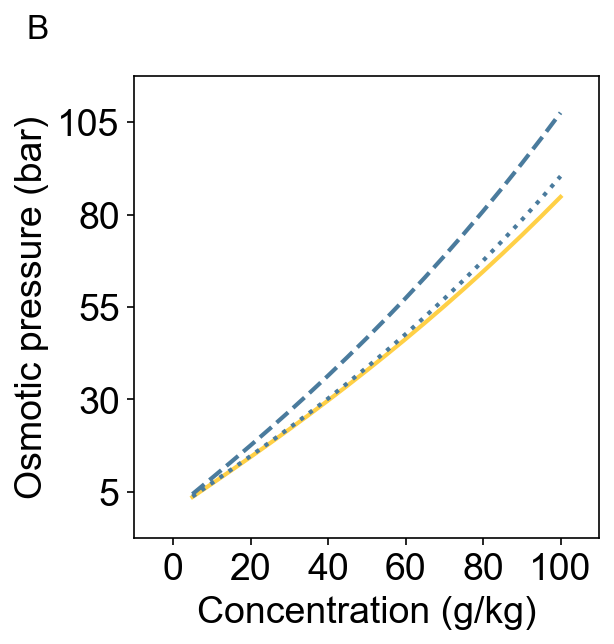

In [216]:
data_bw_2 = data_bw[(data_bw["Mono to Di Ratio"]==2)]
data_bw_25 = data_bw[(data_bw["Mono to Di Ratio"]==0.5)]

figure = figureGenerator()
figure.init_figure(        
    width=4,
    height=4,
    )
figure.set_default_figure_settings(font_size=text_size_default-2, label_size=text_size_default)
figure.plot_line(
    data_sea['# Feed Mass Frac']*1000, 
    -data_sea['Enthalpy']/1000,
    marker_overlay=None,
    label="",
    marker="",
    ls="-",
    lw=2,
    color=sea_color,
    ax_idx=0,
        )
figure.plot_line(
    data_bw_2['# Feed Mass Frac']*1000, 
    -data_bw_2['Enthalpy']/1000,
    marker_overlay=None,
    label="",
    marker="",
    ls="--",
    lw=2,
    color=bw_color,
    ax_idx=0,
)
figure.plot_line(
    data_bw_25['# Feed Mass Frac']*1000, 
    -data_bw_25['Enthalpy']/1000,
    marker_overlay=None,
    label="",
    marker="",
    ls=":",
    lw=2,
    color=bw_color,
    ax_idx=0,
)
spacing_factor = 2
yformat=[[85,105],5]
xformat=[[0,100],20]
ylim = yformat[0]
yinc = yformat[1]
xlim = xformat[0]
xinc = xformat[1]
plt.ylim(ylim[0]-yinc/spacing_factor, ylim[1]+yinc/spacing_factor)
plt.xlim(xlim[0]-xinc/spacing_factor, xlim[1]+xinc/spacing_factor)
plt.xlabel("Concentration (g/kg)",fontsize=text_size_default)
plt.ylabel("Enthalpy (kJ/kg)",fontsize=text_size_default)
plt.xticks([0, 20, 40, 60, 80, 100],fontsize=text_size_default)
plt.yticks(np.linspace(ylim[0], ylim[1], int(round((ylim[1]-ylim[0])/yinc))+1),fontsize=text_size_default)
plt.legend(["Seawater","Monovalent dominant","Divalent dominant"], loc="lower left", frameon=False,fontsize=text_size_default-6)
figure.add_text(-35, 110, "A")
figure.save_fig(name="mono_di_enth")

figure = figureGenerator()
figure.init_figure(        
    width=4,
    height=4,
    )
figure.set_default_figure_settings(font_size=text_size_default-2, label_size=text_size_default)
figure.plot_line(
    data_sea['# Feed Mass Frac']*1000, 
    data_sea['Osmotic Pressure']/1e5,
    marker_overlay=None,
    label="",
    marker="",
    ls="-",
    lw=2,
    color=sea_color,
        )
figure.plot_line(
    data_bw_2['# Feed Mass Frac']*1000, 
    data_bw_2['Osmotic Pressure']/1e5,
    marker_overlay=None,
    label="",
    marker="",
    ls="--",
    lw=2,
    color=bw_color,
)
figure.plot_line(
    data_bw_25['# Feed Mass Frac']*1000, 
    data_bw_25['Osmotic Pressure']/1e5,
    marker_overlay=None,
    label="",
    marker="",
    ls=":",
    lw=2,
    color=bw_color,
)
figure.add_text(-35, 130, "B")
spacing_factor = 2
yformat=[[5,105],25]
xformat=[[0,100],20]
ylim = yformat[0]
yinc = yformat[1]
xlim = xformat[0]
xinc = xformat[1]
plt.ylim(ylim[0]-yinc/spacing_factor, ylim[1]+yinc/spacing_factor)
plt.xlim(xlim[0]-xinc/spacing_factor, xlim[1]+xinc/spacing_factor)
plt.xlabel("Concentration (g/kg)",fontsize=text_size_default)
plt.ylabel("Osmotic pressure (bar)",fontsize=text_size_default)
plt.xticks([0, 20, 40, 60, 80, 100],fontsize=text_size_default)
plt.yticks(np.linspace(ylim[0], ylim[1], int(round((ylim[1]-ylim[0])/yinc))+1),fontsize=text_size_default)
figure.save_fig(name="mono_di_osm_p")


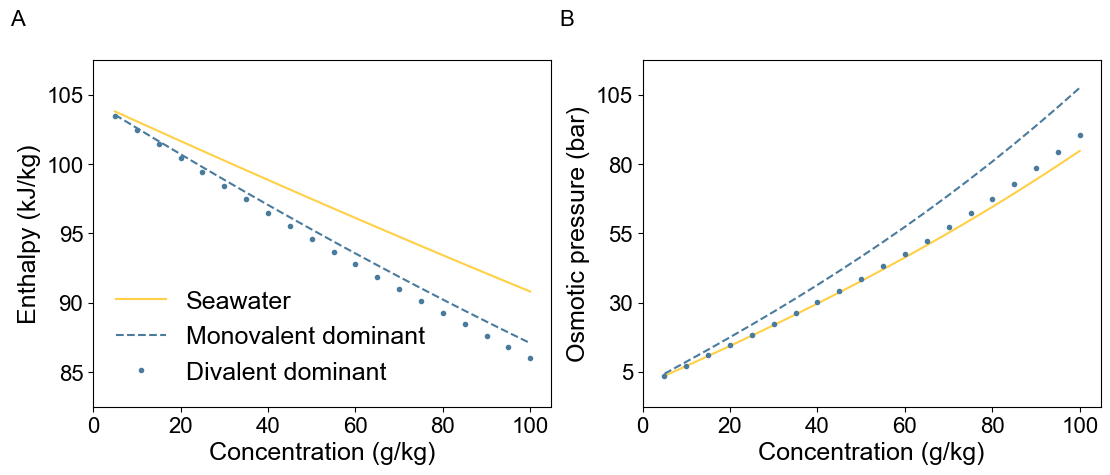

In [217]:
fig, axs = plt.subplots(ncols=2, nrows=1,figsize=(13,4.5),)
data_bw_2 = data_bw[(data_bw["Mono to Di Ratio"]==2)]
data_bw_25 = data_bw[(data_bw["Mono to Di Ratio"]==0.5)]

axs[0].text(-19, 110, "A")
axs[1].text(-19, 130, "B")
# axs[0].set_title("A", loc="left", pad=15)
# axs[1].set_title("B", loc="left", pad=15)

axs[0].plot(data_sea['# Feed Mass Frac']*1000, -data_sea['Enthalpy']/1000, color=sea_color)
axs[0].plot(data_bw_2['# Feed Mass Frac']*1000, -data_bw_2['Enthalpy']/1000, "--", color=bw_color)
axs[0].plot(data_bw_25['# Feed Mass Frac']*1000, -data_bw_25['Enthalpy']/1000, ".", color=bw_color)

axs[0].set_xlabel("Concentration (g/kg)", fontsize=title_size)
axs[0].set_ylabel("Enthalpy (kJ/kg)", fontsize=title_size)
axs[0].set_xticks([0, 20, 40, 60, 80, 100])
spacing_factor = 2
yformat=[[85,105],5]
ylim = yformat[0]
yinc = yformat[1]
axs[0].set_ylim(ylim[0]-yinc/spacing_factor, ylim[1]+yinc/spacing_factor)
axs[0].set_yticks(np.linspace(ylim[0], ylim[1], int(round((ylim[1]-ylim[0])/yinc))+1))
# axs[0].set_yticks([85,90,95,100,105])

axs[1].plot(data_sea['# Feed Mass Frac']*1000, data_sea['Osmotic Pressure']/1e5, color=sea_color)
axs[1].plot(data_bw_2['# Feed Mass Frac']*1000, data_bw_2['Osmotic Pressure']/1e5, "--", color=bw_color)
axs[1].plot(data_bw_25['# Feed Mass Frac']*1000, data_bw_25['Osmotic Pressure']/1e5, ".", color=bw_color)

axs[1].set_xlabel("Concentration (g/kg)", fontsize=title_size)
axs[1].set_ylabel("Osmotic pressure (bar)", fontsize=title_size)


axs[0].legend(["Seawater","Monovalent dominant","Divalent dominant"], loc="lower left", fontsize=title_size, frameon=False)
axs[1].set_xticks([0, 20, 40, 60, 80, 100])
spacing_factor = 2
yformat=[[5,105],25]
ylim = yformat[0]
yinc = yformat[1]
axs[1].set_ylim(ylim[0]-yinc/spacing_factor, ylim[1]+yinc/spacing_factor)
axs[1].set_yticks(np.linspace(ylim[0], ylim[1], int(round((ylim[1]-ylim[0])/yinc))+1))

axs[1].yaxis.set_tick_params(labelbottom=True)

fig.savefig("Mono_Di_Enth_Osm_P",bbox_inches="tight",dpi=600)

In [218]:
s1 = pd.read_csv(r"C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\MVC_Reaktoro_sensitivity_4.csv")
s2 = pd.read_csv(r"C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\MVC_Reaktoro_sensitivity_5.csv")
s3 = pd.read_csv(r"C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\MVC_Reaktoro_sensitivity_6.csv")

s4 = pd.read_csv(r"C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\MVC_Sea_sensitivity_1.csv")
s5 = pd.read_csv(r"C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\MVC_Sea_sensitivity_2.csv")
s6 = pd.read_csv(r"C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\MVC_Sea_sensitivity_3.csv")

s7 = pd.read_csv(r"C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\MVC_NaCl_sensitivity_1.csv")
s8 = pd.read_csv(r"C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\MVC_NaCl_sensitivity_2.csv")
s9 = pd.read_csv(r"C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\MVC_NaCl_sensitivity_3.csv")

In [219]:
color_list = [
                "#a6cee3",
                "#1f78b4",
                "#b2df8a",
                "#33a02c",
                "#fb9a99",
                "#e31a1c",
                "#fdbf6f",
                "#ff7f00",
                "#cab2d6",
                "#6a3d9a",
                "#ffff99",
                "#b15928",
            ]

light = color_list[0]
mid_light = color_list[2]
mid_dark = color_list[1]
dark = color_list[3]

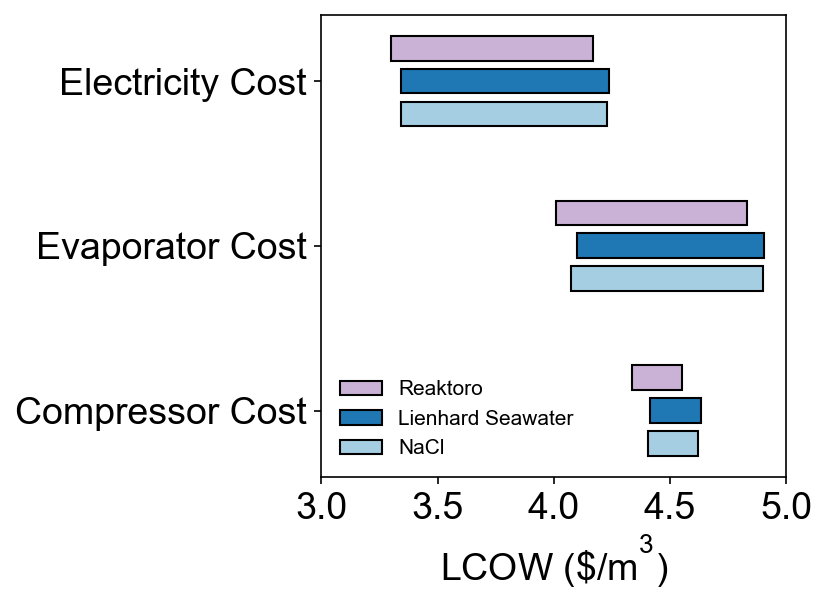

In [220]:
# Original parameter names and grouping labels
parameters = ["Electricity Cost","Evaporator Cost","Compressor Cost"]
n_subbars = 3

# Sample data for LCOW_low and LCOW_high (the reordered values should match your data)
LCOW_low = [s1["LCOW"][0], s2["LCOW"][0], s3["LCOW"][0], 
            s4["LCOW"][0], s5["LCOW"][0], s6["LCOW"][0], 
            s7["LCOW"][0], s8["LCOW"][0], s9["LCOW"][0], 
            ]

LCOW_high = [s1["LCOW"][1], s2["LCOW"][1], s3["LCOW"][1], 
             s4["LCOW"][1], s5["LCOW"][1], s6["LCOW"][1], 
             s7["LCOW"][1], s8["LCOW"][1], s9["LCOW"][1],
             ]

# New ordered indices based on the new parameter order
indices_order = [0, 3, 6,
                 1, 4, 7,
                 2, 5, 8]

# Reorder LCOW_low and LCOW_high based on the new indices
# parameters_new = [parameters[i] for i in indices_order]
LCOW_low = [LCOW_low[i] for i in indices_order]
LCOW_high = [LCOW_high[i] for i in indices_order]

base_y_pos = np.arange(len(parameters))
y_pos = []
offset = [-0.2, 0, 0.2]

for y in base_y_pos:
    for o in offset:
        y_pos.append(y + o)

fig = figureGenerator()
fig.init_figure(        
    width=4,
    height=4,
    )
fig.set_default_figure_settings(font_size=title_size, label_size=title_size)

light = color_list[0]
mid_light = color_list[1]
dark = color_list[8]
# econ =  color_list[2]
# econ2 =  color_list[3]
color = [dark, mid_light, light,
         dark, mid_light, light,
         dark, mid_light, light,
]

# y_pos = np.arange(len(parameters))

width = []
bottom = []
for low, high in zip(LCOW_low, LCOW_high):
    width.append(abs(high - low))
    bottom.append(min(low, high))

# Loop over each parameter to plot individual bars with unique labels
for y, w, b, c in zip(y_pos, width, bottom, color):
    fig.plot_bar(
        [y],  # single y position
        [w],  # single width
        bottom=[b],  # single bottom position
        width=0.15,
        vertical=False,
        color=c,
        capsize=12
    )


# Additional plot settings
plt.tick_params(labelsize=title_size)
plt.xlim(3,5)
plt.xlabel("LCOW ($\$$/m$^3$)",fontsize=text_size_default)
plt.legend(["Reaktoro","Lienhard Seawater","NaCl"], loc="lower left", fontsize=10, frameon=False)

plt.yticks(base_y_pos, parameters)
plt.gca().invert_yaxis()
plt.savefig("MVC_sensitivity", dpi=600, bbox_inches='tight')

In [221]:
s1 = pd.read_csv(r"C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\RO_Reaktoro_sensitivity_5.csv")
s2 = pd.read_csv(r"C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\RO_Reaktoro_sensitivity_6.csv")

s3 = pd.read_csv(r"C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\RO_Sea_sensitivity_1.csv")
s4 = pd.read_csv(r"C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\RO_Sea_sensitivity_2.csv")

s5 = pd.read_csv(r"C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\RO_NaCl_sensitivity_1.csv")
s6 = pd.read_csv(r"C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\RO_NaCl_sensitivity_2.csv")


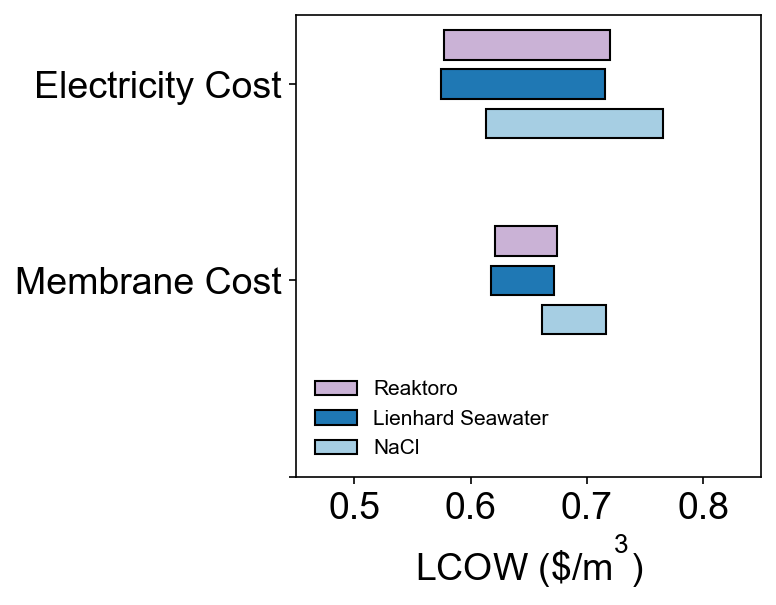

In [222]:
# Original parameter names and grouping labels
parameters = ["Electricity Cost","Membrane Cost",""]

# Sample data for LCOW_low and LCOW_high (the reordered values should match your data)
LCOW_low = [s1["LCOW"][0], s2["LCOW"][0], 
            s3["LCOW"][0], s4["LCOW"][0], 
            s5["LCOW"][0], s6["LCOW"][0],  
            ]

LCOW_high = [s1["LCOW"][1], s2["LCOW"][1], 
             s3["LCOW"][1], s4["LCOW"][1], 
             s5["LCOW"][1], s6["LCOW"][1], 
             ]

# New ordered indices based on the new parameter order
indices_order = [0, 2, 4, 
                 1, 3, 5,]

# Reorder LCOW_low and LCOW_high based on the new indices
# parameters_new = [parameters[i] for i in indices_order]
LCOW_low = [LCOW_low[i] for i in indices_order]
LCOW_high = [LCOW_high[i] for i in indices_order]

# base_y_pos = np.arange(len(parameters))
# y_pos = []
# offset = [-0.2, 0, 0.2]

# for y in base_y_pos:
#     for o in offset:
#         y_pos.append(y + o)


fig = figureGenerator()
fig.init_figure(        
    width=4,
    height=4,
    )
fig.set_default_figure_settings(font_size=text_size_default-2, label_size=text_size_default)

light = color_list[0]
mid_light = color_list[1]
dark = color_list[8]
# econ =  color_list[2]
# econ2 =  color_list[3]
color = [dark, mid_light, light,
         dark, mid_light, light,

]

# y_pos = np.arange(len(parameters))

width = []
bottom = []
for low, high in zip(LCOW_low, LCOW_high):
    width.append(abs(high - low))
    bottom.append(min(low, high))

# Loop over each parameter to plot individual bars with unique labels
for y, w, b, c in zip(y_pos, width, bottom, color):
    fig.plot_bar(
        [y],  # single y position
        [w],  # single width
        bottom=[b],  # single bottom position
        width=0.15,
        vertical=False,
        color=c,
    )

# Additional plot settings
plt.tick_params(labelsize=title_size)
plt.xlim(0.45,0.85)
plt.xlabel("LCOW ($\$$/m$^3$)", fontsize=title_size)
plt.legend(["Reaktoro","Lienhard Seawater","NaCl"], loc='lower left', fontsize=10, frameon=False)

plt.yticks(base_y_pos, parameters)
plt.gca().invert_yaxis()

plt.savefig("RO_sensitivity", dpi=600, bbox_inches='tight')